# Pandas库

pandas是python第三方库，提供高性能易用数据类型和分析工具。

pandas基于numpy实现，常与numpy和matplotlib一同使用

更多学习，请参考pandas中文网：https://www.pypandas.cn/

<br/>

**Pandas核心数据结构：**

<img src="https://ai-studio-static-online.cdn.bcebos.com/a8c80653f39b479dab9f6867a638b64c405e79d6540c4307a22f43c4b0e228bc" width='300' heighr='300'>

<img src="https://ai-studio-static-online.cdn.bcebos.com/c8f06f423acc488fb391bca5dcf8f2b02d7444ef526f41599b6b430ae24659c1" width='500' height='500'>

## Series
Series是一种类似于一维数组的对象，它由一维数组（各种numpy数据类型）以及一组与之相关的数据标签（即索引）组成.

可理解为带标签的一维数组，可存储整数、浮点数、字符串、Python 对象等类型的数据。

### Series创建

#### 由数组创建

In [3]:
import pandas as pd
import numpy as np
s1 = pd.Series(['a','b','c','d','e'])
print(s1)

0    a
1    b
2    c
3    d
4    e
dtype: object


In [ ]:
s1 = pd.Series(('a','b','c','d','e'))
print(s1)

In [ ]:
pd.Series(np.array((1,3,5,6)))

In [ ]:
pd.Series(np.arange(4))

In [ ]:
s1.values

In [ ]:
#与字典不同的是：Series允许索引重复
s = pd.Series(['a','b','c','d','e'],index=[100,200,100,400,500])
print(s)

##### 创建日期序列

In [ ]:
dates=pd.date_range("20201101","20201120")
dates

In [ ]:
pd.Series(np.arange(20),index=dates)

如何访问呢？

#### 由字典创建

In [ ]:
d = {'b': 1, 'a': 0, 'c': 2}
pd.Series(d)


In [ ]:
d.index()

### Series的访问

可以通过Series的values和index属性获取其数组表示形式和索引对象

#### 通过索引访问

In [ ]:
#与普通numpy数组相比，可以通过索引的方式选取Series中的单个或一组值
print(s[100])
print(s[[400, 500]])

In [ ]:
s

In [ ]:
s[1:3]

#### 通过下标访问

没有指定index的可以通过下标访问

index也可以是字符串类型

In [ ]:
s = pd.Series(np.array([1,2,3,4,5]), index=['a', 'b', 'c', 'd', 'e'])

由array创建的即可以通过索引访问也可以通过数组下标访问

### Series运算

In [ ]:
s = pd.Series(np.array([1,2,3,4,5]), index=['a', 'b', 'c', 'd', 'e'])
print(s)

In [ ]:
#对应元素求和
print(s+2)
#对应元素乘
print(s*3)
print(np.log(s))

In [ ]:
np.log(s)

##### Series中最重要的一个功能是：它会在算术运算中自动对齐不同索引的数据

Series 和多维数组的主要区别在于， Series 之间的操作会自动基于标签对齐数据。因此，不用顾及执行计算操作的 Series 是否有相同的标签。

In [ ]:
obj1 = pd.Series({"Ohio": 35000, "Oregon": 16000, "Texas": 71000, "Utah": 5000})
print(obj1)

In [ ]:
obj2 = pd.Series({"California": np.nan, "Ohio": 35000, "Oregon": 16000, "Texas": 71000})
print(obj2)

In [ ]:
obj1+obj2

In [ ]:
obj1 = pd.Series({"Ohio": 35000, "Oregon": 16000, "Texas": 71000, "Utah": 5000})
print(obj1)
obj2 = pd.Series({"California": np.nan, "Ohio": 35000, "Oregon": 16000, "Texas": 71000})
print(obj2)
obj3=obj1+obj2
print(obj3)

##### 有很多nan值怎么判断呢

In [ ]:
obj3.isnull()

In [ ]:
obj3.fillna()

##### 如果没有索引可以指定索引

In [ ]:
s1.index=['s1','s2','s3','s4','s5']
print(s1)

In [ ]:
dates = pd.date_range('20201120', periods=3) # 生成时间序列
df = pd.Series(np.arange(3),index=dates)
print(df)

## DataFrame

<img src="https://ai-studio-static-online.cdn.bcebos.com/c8f06f423acc488fb391bca5dcf8f2b02d7444ef526f41599b6b430ae24659c1" width='500' height='500'>

DataFrame是一个表格型的数据结构，类似于Excel或sql表

它含有一组有序的列，每列可以是不同的值类型（数值、字符串、布尔值等）

DataFrame既有行索引也有列索引，它可以被看做由Series组成的字典（共用同一个索引）

### 创建DataFrame

#### 从字典创建

In [5]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],\
        'year': [2000, 2001, 2002, 2001, 2002], \
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}
frame = pd.DataFrame(data)
print(frame)

    state  year  pop
0    Ohio  2000  1.5
1    Ohio  2001  1.7
2    Ohio  2002  3.6
3  Nevada  2001  2.4
4  Nevada  2002  2.9


In [6]:
frame['year']=frame['year'].astype('str')
frame.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [ ]:
#如果指定了列顺序，则DataFrame的列就会按照指定顺序进行排列
frame1 = pd.DataFrame(data, columns=['year', 'state', 'pop'])
print(frame1)

跟原Series一样，如果传入的列在数据中找不到，就会产生NAN值

In [6]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'], index=['one', 'two', 'three', 'four', 'five'])
print(frame2)

       year   state  pop debt
one    2000    Ohio  1.5  NaN
two    2001    Ohio  1.7  NaN
three  2002    Ohio  3.6  NaN
four   2001  Nevada  2.4  NaN
five   2002  Nevada  2.9  NaN


In [ ]:
df['two':'four']

In [ ]:
#通过类似字典标记的方式或属性的方式，可以将DataFrame的列获取为一个Series,返回的Series拥有原DataFrame相同的索引
type(frame2['state'])

#### 用 Series 创建DataFrame

In [ ]:
d = {'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
print(pd.DataFrame(d))

#### 由二维list/ndarray创建

In [ ]:
pd.DataFrame([[1,2,3],[4,5,6]],columns=['a','b','c'])

In [ ]:
pd.DataFrame(np.arange(12).reshape(3,4),columns=['a','b','c','d'])

##### 读取csv文件创建为一个dateframe

In [ ]:
help(pd.read_csv)

In [ ]:
pf=pd.read_table("examples/bigdata2019.txt",sep='\t',encoding='utf-8')
pf.info()

In [ ]:
pf.head()

In [ ]:
pf.出生年月

## 索引

### series索引

##### Series的索引方式类似于Numpy数组的索引，Series的索引不只是整数

In [ ]:
obj=pd.Series(np.arange(4),index=['a','b','c','d'])
obj

In [ ]:
obj['b':'d']

In [ ]:
obj[3]

### DataFrame索引

In [ ]:
frame2

In [ ]:
frame2[1:3]

##### loc的用法

In [ ]:
frame2.loc['one','state']

#### 通过行号索引 单行或者多行iloc

In [ ]:
frame2

In [ ]:
frame2.iloc[1:4,1]

#### 通过行标签索引 单行或者多行loc


In [ ]:
frame2.loc['two':'five']

也可以和列索引配合使用

In [ ]:
frame2.iloc[1:3,:2]

可以选取pop大于2的数据

In [3]:
import pandas as pd

In [8]:
df = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'], index=['one', 'two', 'three', 'four', 'five'])
print(df)
df['pop']>2

       year   state  pop debt
one    2000    Ohio  1.5  NaN
two    2001    Ohio  1.7  NaN
three  2002    Ohio  3.6  NaN
four   2001  Nevada  2.4  NaN
five   2002  Nevada  2.9  NaN


one      False
two      False
three     True
four      True
five      True
Name: pop, dtype: bool

In [10]:
df[(df['pop']>2) &(df['year']==2001)]

,year,state,pop,debt
four,2001,Nevada,2.4,NaN


## 函数应用

In [11]:
df

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


In [12]:
f=lambda x: 10*x

In [13]:
df['pop'].apply(f)

one      15.0
two      17.0
three    36.0
four     24.0
five     29.0
Name: pop, dtype: float64

In [14]:
df['pop'].apply(lambda x:10*x)

one      15.0
two      17.0
three    36.0
four     24.0
five     29.0
Name: pop, dtype: float64

In [15]:
df['pop'].apply(lambda x:"{:.2%}".format(x))

one      150.00%
two      170.00%
three    360.00%
four     240.00%
five     290.00%
Name: pop, dtype: object

In [ ]:
frame2['pop']/frame2['pop'].sum()

每一列的操作方法：

In [ ]:
frame2['pop'].min()

In [ ]:
frame2['pop'].max()

In [ ]:
frame2['pop'].std()

In [ ]:
frame2['pop'].sum()

In [ ]:
frame2['pop'].median()

## 排序与排名

In [16]:
df

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


In [17]:
df.sort_index()

,year,state,pop,debt
five,2002,Nevada,2.9,NaN
four,2001,Nevada,2.4,NaN
one,2000,Ohio,1.5,NaN
three,2002,Ohio,3.6,NaN
two,2001,Ohio,1.7,NaN


In [18]:
df.sort_index(axis=1)

,debt,pop,state,year
one,NaN,1.5,Ohio,2000
two,NaN,1.7,Ohio,2001
three,NaN,3.6,Ohio,2002
four,NaN,2.4,Nevada,2001
five,NaN,2.9,Nevada,2002


若按照pop值排序呢？

In [9]:
df.sort_values(by='pop',ascending=False)

,year,state,pop,debt
three,2002,Ohio,3.6,NaN
five,2002,Nevada,2.9,NaN
four,2001,Nevada,2.4,NaN
two,2001,Ohio,1.7,NaN
one,2000,Ohio,1.5,NaN


In [ ]:
frame2.sort_values(by='pop')

In [11]:

df.sort_values(by='pop',ascending=False)

,year,state,pop,debt
three,2002,Ohio,3.6,NaN
five,2002,Nevada,2.9,NaN
four,2001,Nevada,2.4,NaN
two,2001,Ohio,1.7,NaN
one,2000,Ohio,1.5,NaN


In [1]:
import pandas as pd
class_frame=pd.read_table("examples/bigdata2019.txt",sep='\t',encoding='utf-8')

In [2]:
class_frame.head()

,姓名,专业,出生年月,籍贯,性别
0,朱珺阳,大数据管理与应用,200003,北京市,男
1,霍頔,大数据管理与应用,200003,北京市,男
2,张禹欣,大数据管理与应用,200009,北京市,女
3,王洋,大数据管理与应用,200102,山西省,男
4,周进魁,大数据管理与应用,200106,河南省,男


In [3]:
class_frame['姓']=class_frame['姓名'].str[0]

In [4]:
class_frame['性别'].value_counts()

男    21
女    10
Name: 性别, dtype: int64

Text(0.5, 1.0, '姓氏分布')

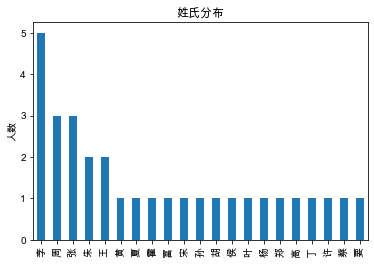

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.font_manager import FontProperties
# 设置显示的尺寸
plt.rcParams['font.family'] = ['Arial Unicode MS'] #正常显示中文
class_frame['姓'].value_counts().plot(kind="bar")
plt.ylabel("人数")
plt.title("姓氏分布")

Text(0.5, 1.0, '性别分布')

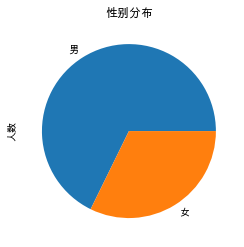

In [17]:
class_frame['性别'].value_counts().plot(kind="pie")
plt.ylabel("人数")
plt.title("性别分布")

In [18]:
class_frame['性别'].value_counts()

男    21
女    10
Name: 性别, dtype: int64

Text(0.5, 1.0, '原籍分布')

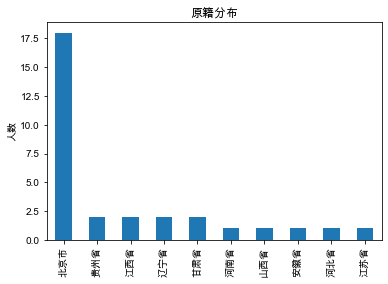

In [19]:
class_frame['籍贯'].value_counts().plot(kind="bar")
plt.ylabel("人数")
plt.title("原籍分布")

In [20]:
class_frame['籍贯'].value_counts()

北京市    18
贵州省     2
江西省     2
辽宁省     2
甘肃省     2
河南省     1
山西省     1
安徽省     1
河北省     1
江苏省     1
Name: 籍贯, dtype: int64

In [21]:
class_frame['age']=20

In [22]:
class_frame

,姓名,专业,出生年月,籍贯,性别,姓,age
0,朱珺阳,大数据管理与应用,200003,北京市,男,朱,20
1,霍頔,大数据管理与应用,200003,北京市,男,霍,20
2,张禹欣,大数据管理与应用,200009,北京市,女,张,20
3,王洋,大数据管理与应用,200102,山西省,男,王,20
4,周进魁,大数据管理与应用,200106,河南省,男,周,20
5,蔡卓雅,大数据管理与应用,200010,江苏省,女,蔡,20
6,丁美晨,大数据管理与应用,200103,北京市,女,丁,20
7,富曼婷,大数据管理与应用,200104,北京市,女,富,20
8,侯叶馨,大数据管理与应用,200101,北京市,女,侯,20
9,胡昕茹,大数据管理与应用,200103,河北省,女,胡,20


In [24]:
from datetime import datetime
class_frame['出生年月']=class_frame['出生年月'].apply(lambda x:datetime.strptime(str(x),"%Y%m"))

In [25]:
class_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
姓名      31 non-null object
专业      31 non-null object
出生年月    31 non-null datetime64[ns]
籍贯      31 non-null object
性别      31 non-null object
姓       31 non-null object
age     31 non-null int64
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 1.8+ KB


In [26]:
class_frame['age']=datetime.today().year-class_frame['出生年月'].apply(lambda x:x.year)

In [30]:
class_frame

,姓名,专业,出生年月,籍贯,性别,姓,age
0,朱珺阳,大数据管理与应用,2000-03-01,北京市,男,朱,20
1,霍頔,大数据管理与应用,2000-03-01,北京市,男,霍,20
2,张禹欣,大数据管理与应用,2000-09-01,北京市,女,张,20
3,王洋,大数据管理与应用,2001-02-01,山西省,男,王,19
4,周进魁,大数据管理与应用,2001-06-01,河南省,男,周,19
5,蔡卓雅,大数据管理与应用,2000-10-01,江苏省,女,蔡,20
6,丁美晨,大数据管理与应用,2001-03-01,北京市,女,丁,19
7,富曼婷,大数据管理与应用,2001-04-01,北京市,女,富,19
8,侯叶馨,大数据管理与应用,2001-01-01,北京市,女,侯,19
9,胡昕茹,大数据管理与应用,2001-03-01,河北省,女,胡,19


/Users/lili/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


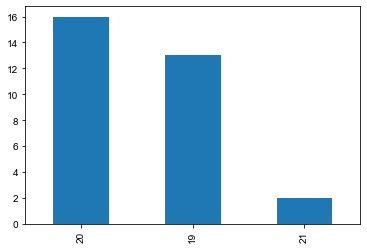

In [27]:
class_frame['age'].value_counts().plot("bar")

In [ ]:
datetime.today().year